In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Visualization

In [32]:
demo = pd.read_csv('demographic_without_one_hot.csv')

In [33]:
CMX_features = pd.read_csv('CMX_features.csv')

df_dia = pd.merge(CMX_features,demo, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')

In [4]:
df_dia.head()

,SUBJECT_ID,length_of_stay,diag_NUM,LOS,Unnamed: 0,HADM_ID,ADMITTIME,DOB,DOD,1_yr_mortality,...,WHITE - OTHER EUROPEAN,WHITE - RUSSIAN,DIVORCED,LIFE PARTNER,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED,GENDER
0,3,10,9.0,6.0646,213,145834,2101-10-20 19:08:00,2025-04-11 00:00:00,2102-06-14 00:00:00,1,...,0,0,0,0,1,0,0,0,0,0
1,4,7,9.0,1.6785,214,185777,2191-03-16 00:28:00,2143-05-12 00:00:00,NaN,0,...,0,0,0,0,0,0,1,0,0,1
2,6,16,8.0,3.6729,216,107064,2175-05-30 07:15:00,2109-06-21 00:00:00,NaN,0,...,0,0,0,0,1,0,0,0,0,1
3,9,4,6.0,5.3231,219,150750,2149-11-09 13:06:00,2108-01-26 00:00:00,2149-11-14 00:00:00,1,...,0,0,0,0,0,0,0,0,0,0
4,11,25,1.0,1.5844,221,194540,2178-04-16 06:18:00,2128-02-22 00:00:00,2178-11-14 00:00:00,1,...,0,0,0,0,1,0,0,0,0,1


### Using XGBoost to show feature importance

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
ds_final = pd.read_csv('dataset_normalized_05022019.csv')
# process dataset
np.random.seed(1)
nnn_x, nnn_y = ds_final[ds_final.columns[2:]].values, np.expand_dims(ds_final[ds_final.columns[1]].values, axis=1)
np.random.shuffle(nnn_x)
np.random.shuffle(nnn_y)
train_ratio = 0.7
nnn_train_x, nnn_train_y, nnn_test_x, nnn_test_y = nnn_x[:int(train_ratio*nnn_x.shape[0]), :], nnn_y[:int(train_ratio*nnn_x.shape[0])], nnn_x[int(train_ratio*nnn_x.shape[0]):, :], nnn_y[int(train_ratio*nnn_x.shape[0]):]

In [2]:
for ec in ds_final.columns:
    if 'Unnamed' in ec:
        print(ec)
        del ds_final[ec]

Unnamed: 0


In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
np.random.seed(2)
XGB_model = XGBClassifier()
XGB_model.fit(nnn_x, nnn_y)
# plot feature importance
plot_importance(XGB_model)
plt.show()

def my_plot_importance(booster, column_names, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=(figsize))
    plot_importance(booster=booster, ax=ax, max_num_features=15, grid=True)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label,] +
ax.get_xticklabels()):
        item.set_fontsize(15)
    name_list = []
    for item in (ax.get_yticklabels()):
        num = int(item.get_text()[1:])
        name_list.append(column_names[num])
        item.set_fontsize(15)
    ax.set_yticklabels(name_list)
    print(name_list)
    plt.title('Feature importance top 15')
    ax.title.set_fontsize(20)
    plt.tight_layout()
    fig.savefig('Feature_importance.png')
    
my_plot_importance(XGB_model, ds_final.columns[2:], (8,8))

d:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Admission specific, Diagnosis and ICU information Plots

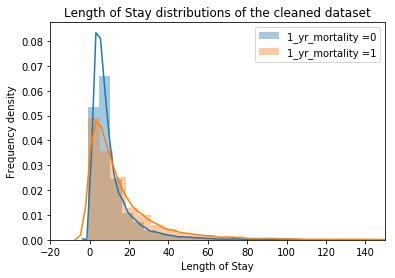

In [5]:
df_0_los = df_dia[df_dia['1_yr_mortality'] ==0]
df_1_los= df_dia[df_dia['1_yr_mortality'] ==1]

sns.distplot(df_0_los['length_of_stay'],label ='1_yr_mortality =0')
sns.distplot(df_1_los['length_of_stay'],label ='1_yr_mortality =1')
plt.xlim(-20,150)
plt.legend()
plt.xlabel('Length of Stay')
plt.ylabel('Frequency density')
plt.title('Length of Stay distributions of the cleaned dataset')
plt.savefig('Length of Stay.png')

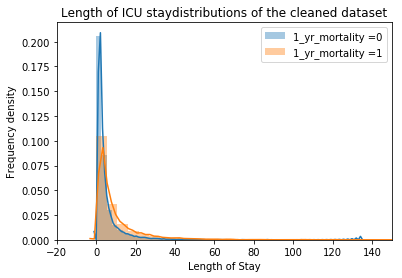

In [6]:
#ICU Length of Stay
df_0_los = df_dia[df_dia['1_yr_mortality'] ==0]
df_1_los= df_dia[df_dia['1_yr_mortality'] ==1]

sns.distplot(df_0_los['LOS'],label ='1_yr_mortality =0')
sns.distplot(df_1_los['LOS'],label ='1_yr_mortality =1')
plt.xlim(-20,150)
plt.legend()
plt.xlabel('Length of Stay')
plt.ylabel('Frequency density')
plt.title('Length of ICU staydistributions of the cleaned dataset')
plt.savefig('Length of ICU Stay.png')

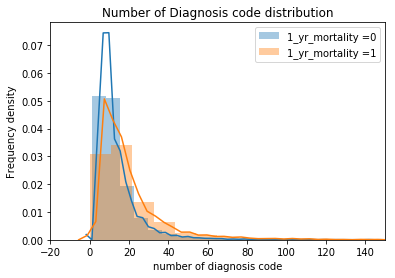

In [8]:
#diagnosis number
df_dia['diag_NUM'] = df_dia['diag_NUM'].astype(int)
df_0_dia = df_dia[df_dia['1_yr_mortality'] ==0]
df_1_dia= df_dia[df_dia['1_yr_mortality'] ==1]

sns.distplot(df_0_dia['diag_NUM'],label ='1_yr_mortality =0')
sns.distplot(df_1_dia['diag_NUM'],label ='1_yr_mortality =1')
plt.xlim(-20,150)
plt.legend()
plt.xlabel('number of diagnosis code')
plt.ylabel('Frequency density')
plt.title('Number of Diagnosis code distribution')
plt.savefig('Diag num.png')

### Outcome Label visualization

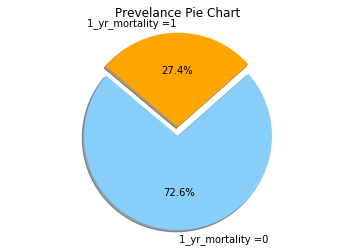

In [11]:
# Data to plot
labels = '1_yr_mortality =0', '1_yr_mortality =1'
sizes = [len(df_dia[df_dia['1_yr_mortality']==0]),len(df_dia[df_dia['1_yr_mortality']==1])]

colors = ['lightskyblue', 'orange']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Prevelance Pie Chart')
plt.savefig('Prevalence.png')

### Lab result plots 

In [10]:
labevents = pd.read_csv('LABEVENTS.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
labitems = pd.read_csv('D_LABITEMS.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [12]:
wbc = labevents[(labevents['VALUEUOM'] =='K/uL')]
# Get one hot encoding of columns MARITAL STATUS
one_hot_wbc = pd.get_dummies(wbc['FLAG'])
# Drop column B as it is now encoded
wbc = wbc.drop('FLAG',axis = 1)
# Join the encoded df
wbc = wbc.join(one_hot_wbc)

In [13]:
wbc.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,abnormal,delta
64,345,3,NaN,51265,2101-10-14 03:00:00,184,184.0,K/uL,0,0
69,350,3,NaN,51301,2101-10-14 03:00:00,9.9,9.9,K/uL,0,0
98,379,3,NaN,51265,2101-10-15 03:30:00,191,191.0,K/uL,0,0
101,382,3,NaN,51301,2101-10-15 03:30:00,9.7,9.7,K/uL,0,0
133,414,3,NaN,51265,2101-10-16 04:00:00,213,213.0,K/uL,0,0


In [14]:
wbc_flag = wbc.groupby(['SUBJECT_ID'])['abnormal'].apply(lambda g: g.sum() / len(g))

In [15]:
wbc_flag = pd.DataFrame(wbc_flag)

In [ ]:
wbc_flag.head()

In [16]:
df_wbc_flag = pd.merge(wbc_flag,demo, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')
df_wbc_flag.head()

,SUBJECT_ID,abnormal,Unnamed: 0,HADM_ID,ADMITTIME,DOB,DOD,1_yr_mortality,Age,AMERICAN INDIAN/ALASKA NATIVE,...,WHITE - OTHER EUROPEAN,WHITE - RUSSIAN,DIVORCED,LIFE PARTNER,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED,GENDER
0,3,0.296875,213,145834,2101-10-20 19:08:00,2025-04-11 00:00:00,2102-06-14 00:00:00,1,76,0,...,0,0,0,0,1,0,0,0,0,0
1,4,0.215686,214,185777,2191-03-16 00:28:00,2143-05-12 00:00:00,NaN,0,48,0,...,0,0,0,0,0,0,1,0,0,1
2,6,0.385714,216,107064,2175-05-30 07:15:00,2109-06-21 00:00:00,NaN,0,66,0,...,0,0,0,0,1,0,0,0,0,1
3,9,0.437500,219,150750,2149-11-09 13:06:00,2108-01-26 00:00:00,2149-11-14 00:00:00,1,41,0,...,0,0,0,0,0,0,0,0,0,0
4,11,0.109375,221,194540,2178-04-16 06:18:00,2128-02-22 00:00:00,2178-11-14 00:00:00,1,50,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
labitems[labitems['ITEMID'] == 51301]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
627,501,51301,White Blood Cells,Blood,Hematology,804-5


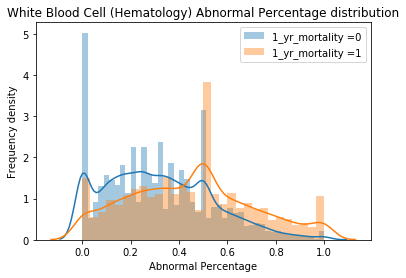

In [19]:
#diagnosis number
df_0_flag = df_wbc_flag[df_wbc_flag['1_yr_mortality'] ==0]
df_1_flag = df_wbc_flag[df_wbc_flag['1_yr_mortality'] ==1]

sns.distplot(df_0_flag['abnormal'],label ='1_yr_mortality =0')
sns.distplot(df_1_flag['abnormal'],label ='1_yr_mortality =1')
#plt.xlim(-20,50)
plt.legend()
plt.xlabel('Abnormal Percentage')
plt.ylabel('Frequency density')
plt.title('White Blood Cell (Hematology) Abnormal Percentage distribution')
plt.savefig('WBC_abnormal.png')

In [26]:
labitems[labitems['ITEMID'] == 50931]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
258,132,50931,Glucose,Blood,Chemistry,2345-7


In [28]:
glucose = labevents[(labevents['VALUEUOM'] =='mg/dL')]
# Get one hot encoding of columns MARITAL STATUS
one_hot_glucose = pd.get_dummies(glucose['FLAG'])
# Drop column B as it is now encoded
glucose = glucose.drop('FLAG',axis = 1)
# Join the encoded df
glucose = glucose.join(one_hot_glucose)
glucose_flag = glucose.groupby(['SUBJECT_ID'])['abnormal'].apply(lambda g: g.sum() / len(g))
glucose_flag = pd.DataFrame(glucose_flag)
df_glucose_flag = pd.merge(glucose_flag,demo, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')
df_glucose_flag.head()

,SUBJECT_ID,abnormal,Unnamed: 0,HADM_ID,ADMITTIME,DOB,DOD,1_yr_mortality,Age,AMERICAN INDIAN/ALASKA NATIVE,...,WHITE - OTHER EUROPEAN,WHITE - RUSSIAN,DIVORCED,LIFE PARTNER,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED,GENDER
0,3,0.455598,213,145834,2101-10-20 19:08:00,2025-04-11 00:00:00,2102-06-14 00:00:00,1,76,0,...,0,0,0,0,1,0,0,0,0,0
1,4,0.360000,214,185777,2191-03-16 00:28:00,2143-05-12 00:00:00,NaN,0,48,0,...,0,0,0,0,0,0,1,0,0,1
2,6,0.421875,216,107064,2175-05-30 07:15:00,2109-06-21 00:00:00,NaN,0,66,0,...,0,0,0,0,1,0,0,0,0,1
3,9,0.419355,219,150750,2149-11-09 13:06:00,2108-01-26 00:00:00,2149-11-14 00:00:00,1,41,0,...,0,0,0,0,0,0,0,0,0,0
4,11,0.138554,221,194540,2178-04-16 06:18:00,2128-02-22 00:00:00,2178-11-14 00:00:00,1,50,0,...,0,0,0,0,1,0,0,0,0,1


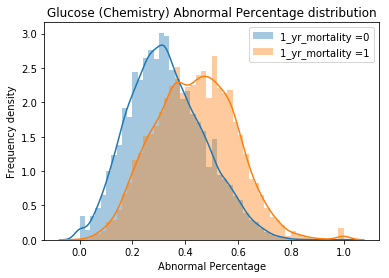

In [29]:
#diagnosis number
df_0_flag = df_glucose_flag[df_glucose_flag['1_yr_mortality'] ==0]
df_1_flag = df_glucose_flag[df_glucose_flag['1_yr_mortality'] ==1]

sns.distplot(df_0_flag['abnormal'],label ='1_yr_mortality =0')
sns.distplot(df_1_flag['abnormal'],label ='1_yr_mortality =1')
#plt.xlim(-20,50)
plt.legend()
plt.xlabel('Abnormal Percentage')
plt.ylabel('Frequency density')
plt.title('Glucose (Chemistry) Abnormal Percentage distribution')
plt.savefig('Glucose_abnormal.png')

In [21]:
lab = pd.read_csv('LabEvents_features.csv')
df_lab = pd.merge(lab,demo, left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')

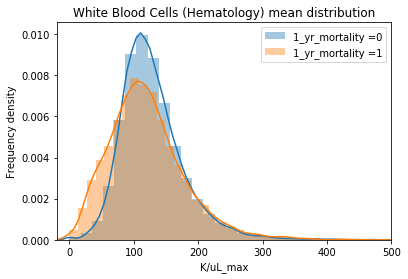

In [22]:
#WBC mean
df_0_lab = df_lab[df_lab['1_yr_mortality'] ==0]
df_1_lab= df_lab[df_lab['1_yr_mortality'] ==1]

sns.distplot(df_0_lab['K/uL_mean'],label ='1_yr_mortality =0')
sns.distplot(df_1_lab['K/uL_mean'],label ='1_yr_mortality =1')
plt.xlim(-20,500)
plt.legend()
plt.xlabel('K/uL_max')
plt.ylabel('Frequency density')
plt.title('White Blood Cells (Hematology) mean distribution')
plt.savefig('WBC_mean.png')

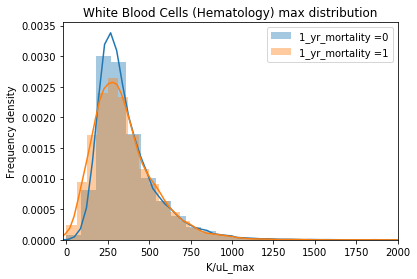

In [24]:
#WBC max
df_0_lab = df_lab[df_lab['1_yr_mortality'] ==0]
df_1_lab= df_lab[df_lab['1_yr_mortality'] ==1]

sns.distplot(df_0_lab['K/uL_max'],label ='1_yr_mortality =0')
sns.distplot(df_1_lab['K/uL_max'],label ='1_yr_mortality =1')
plt.xlim(-20,2000)
plt.legend()
plt.xlabel('K/uL_max')
plt.ylabel('Frequency density')
plt.title('White Blood Cells (Hematology) max distribution')
plt.savefig('WBC_max.png')

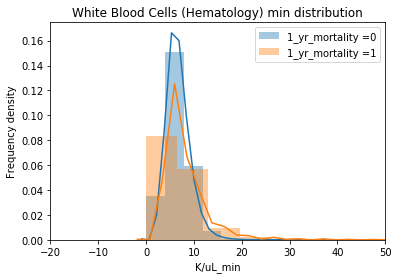

In [25]:
#WBC min
df_0_lab = df_lab[df_lab['1_yr_mortality'] ==0]
df_1_lab= df_lab[df_lab['1_yr_mortality'] ==1]

sns.distplot(df_0_lab['K/uL_min'],label ='1_yr_mortality =0')
sns.distplot(df_1_lab['K/uL_min'],label ='1_yr_mortality =1')
plt.xlim(-20,50)
plt.legend()
plt.xlabel('K/uL_min')
plt.ylabel('Frequency density')
plt.title('White Blood Cells (Hematology) min distribution')
plt.savefig('WBC_min.png')

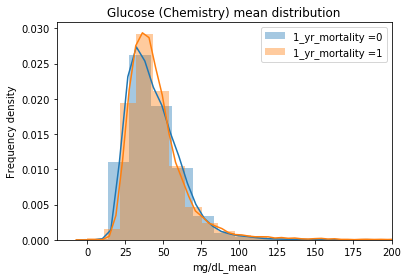

In [31]:
#Glucose Mean Plot
df_0_lab = df_lab[df_lab['1_yr_mortality'] ==0]
df_1_lab= df_lab[df_lab['1_yr_mortality'] ==1]

sns.distplot(df_0_lab['mg/dL_mean'],label ='1_yr_mortality =0')
sns.distplot(df_1_lab['mg/dL_mean'],label ='1_yr_mortality =1')
plt.xlim(-20,200)
plt.legend()
plt.xlabel('mg/dL_mean')
plt.ylabel('Frequency density')
plt.title('Glucose (Chemistry) mean distribution')
plt.savefig('Glucose_mean.png')

### Demographic plots 
- Use the same code for gender and marital status pie charts

In [34]:
df = df_dia
dfd = df[df['DIVORCED']==1]
dfl = df[df['LIFE PARTNER']==1]
dfm = df[df['MARRIED']==1]
dfse = df[df['SEPARATED']==1]
dfsi = df[df['SINGLE']==1]
dfu = df[df['UNKNOWN (DEFAULT)']==1]
dfw = df[df['WIDOWED']==1]

In [37]:
print(dfd.shape[0],dfl.shape[0],dfm.shape[0],dfse.shape[0],dfsi.shape[0],dfu.shape[0],dfw.shape[0])

2291 13 17980 380 9202 284 4413


In [38]:
2291+13+17980+380+9202+284+4413

34563

In [39]:
4413/34563

0.1276798888985331

In [41]:
a = dfd[dfd['1_yr_mortality']==1]
b = dfl[dfl['1_yr_mortality']==1]
c = dfm[dfm['1_yr_mortality']==1]
d = dfse[dfse['1_yr_mortality']==1]
e = dfsi[dfsi['1_yr_mortality']==1]
f = dfu[dfu['1_yr_mortality']==1]
g = dfw[dfw['1_yr_mortality']==1]

print(a.shape[0],b.shape[0],c.shape[0],d.shape[0],e.shape[0],f.shape[0],g.shape[0])

623 1 4747 100 2012 104 1672


### Take Widowed as an example

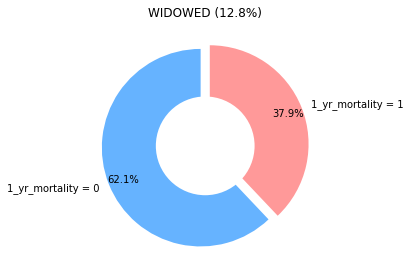

In [42]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['1_yr_mortality = 0', '1_yr_mortality = 1']
sizes = [(4413-1674)/4413,1674/4413]
#colors
colors = ['#66b3ff','#ff9999']
#explsion
explode = (0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.title('WIDOWED (12.8%)')
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout()
plt.show()


### Prescription Plots

In [45]:
drug = pd.read_csv('Prescription_features_nan2zero.csv')

In [46]:
df = pd.merge(demo,drug,left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'], how = 'inner')

In [47]:
df0 = df[df['1_yr_mortality'] == 0]
df1 = df[df['1_yr_mortality'] == 1]

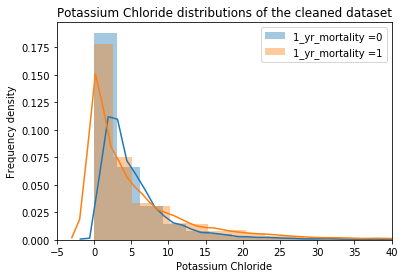

In [51]:
#KCl plot

sns.distplot(df0['Potassium Chloride'], label ='1_yr_mortality =0')
sns.distplot(df1['Potassium Chloride'], label ='1_yr_mortality =1')
plt.xlim(-5,40)
plt.legend()
plt.xlabel('Potassium Chloride')
plt.ylabel('Frequency density')
plt.title('Potassium Chloride distributions of the cleaned dataset')
plt.savefig('Potassium Chloride.png')

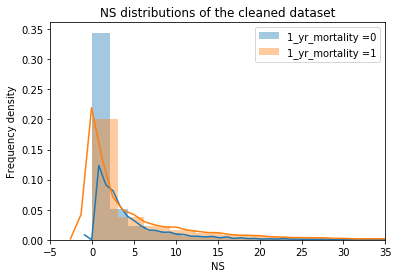

In [52]:
# NS plot
sns.distplot(df0['NS'], label ='1_yr_mortality =0')
sns.distplot(df1['NS'], label ='1_yr_mortality =1')
plt.xlim(-5,35)
plt.legend()
plt.xlabel('NS')
plt.ylabel('Frequency density')
plt.title('NS distributions of the cleaned dataset')
plt.savefig('NS.png')

### Scatter Plot Matrix

In [ ]:
%matplotlib inline
sample_fds = ds_final.sample(frac=0.30)
fig2 = pd.plotting.scatter_matrix(sample_fds[sample_fds.keys()[np.array([28, 37, 31, 70,73])]], alpha = 0.3, figsize = (12,12), diagonal = 'kde')
plt.savefig('normalized_scatter_plot_1.png')